In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,20)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df2 = df1.fillna({
    'location':df1.location.apply(lambda x: 'Whitefield'),
    'total_sqft': df1.total_sqft.mode(),
    'bath': round(df1['bath'].mean()),
    'size': df1['size'].apply(lambda x: '2 BHK'),
    
    })
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df2.shape

(13320, 5)

In [9]:
df1['location'].unique(),df1['bath'].unique()

(array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
        '12th cross srinivas nagar banshankari 3rd stage',
        'Havanur extension', 'Abshot Layout'], dtype=object),
 array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
        27., 12., 16., 40., 15., 13., 18.]))

In [10]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,3.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,3.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,3.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [16]:
df2[~df2['total_sqft'].apply(is_float)].total_sqft.unique()

array(['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156',
       '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740',
       '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch',
       '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800',
       '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130',
       '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter',
       '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273',
       '3630 - 3800', '660 - 670', '1500Sq. Meter', '620 - 933',
       '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards',
       '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49',
       '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360',
       '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804',
       '1255 - 1863', '1300 - 1405', '1

In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2166')

2166.0

In [19]:
convert_sqft_to_num('2166-2850')

2508.0

In [20]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK


In [22]:
df3.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [23]:
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df3.location.unique())

1305

In [25]:
df3.location = df3.location.apply(lambda x:x.strip())# it will remover leading spaces
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield            542
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1294, dtype: int64

In [26]:
'  i am nafis   '.strip()

'i am nafis'

In [27]:
len(location_stats[location_stats<=10])

1053

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli        10
Sector 1 HSR Layout    10
Basapura               10
Dodsworth Layout       10
Naganathapura          10
                       ..
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
Konappana Agrahara      1
1 Annasandrapalya       1
Name: location, Length: 1053, dtype: int64

In [29]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

In [30]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [31]:
df3[df3.total_sqft/df3.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df.shape

(13320, 9)

In [33]:
df4 =df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12576, 7)

In [34]:
df4.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'): #grouping data by per loaction and calculating mean, std of it
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)# saving fair values in df_out frame
    return df_out# end result is df_out
df5=remove_pps_outlier(df4)
df5.shape

(10301, 7)

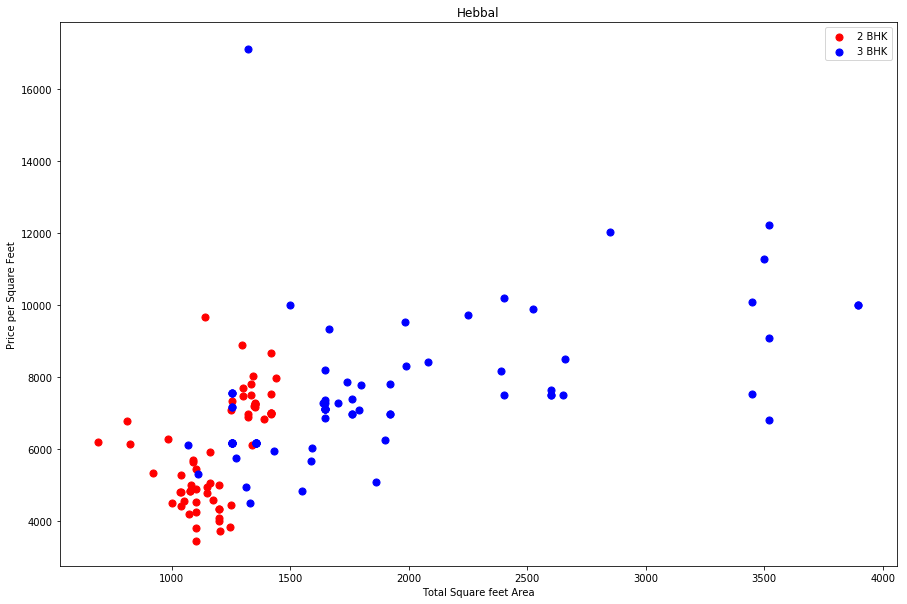

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='blue',label='3 BHK',s=50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df4,"Hebbal")

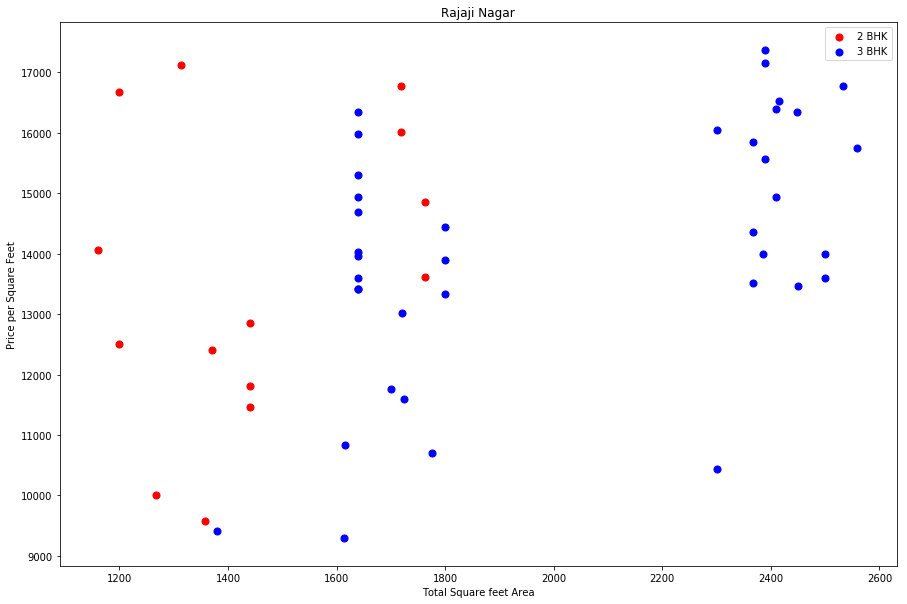

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='blue',label='3 BHK',s=50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df5,"Rajaji Nagar")

In [38]:
#!python -m pip install numpy==1.16.5

In [39]:
def  remove_BHK_outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):#df Group by location and creating dataframe 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):#creating dataframe of df location groupby again bedroom groupby
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),#calculating mean,std of BHK from each location
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'): #creating dataframe of df location groupby again bedroom groupby
            stats =bhk_stats.get(bhk-1)# mean, std of BHK-1
            if stats and stats['count']>5:# it will continue the loop up to 4 bed
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)#checking if the mean value BHK of ppsqft is less than mean of ppsqft BHK- 
    return df.drop(exclude_indices,axis='index')# end result drop those unfair values from df
df6=remove_BHK_outlier(df5)
df6.shape

(7361, 7)

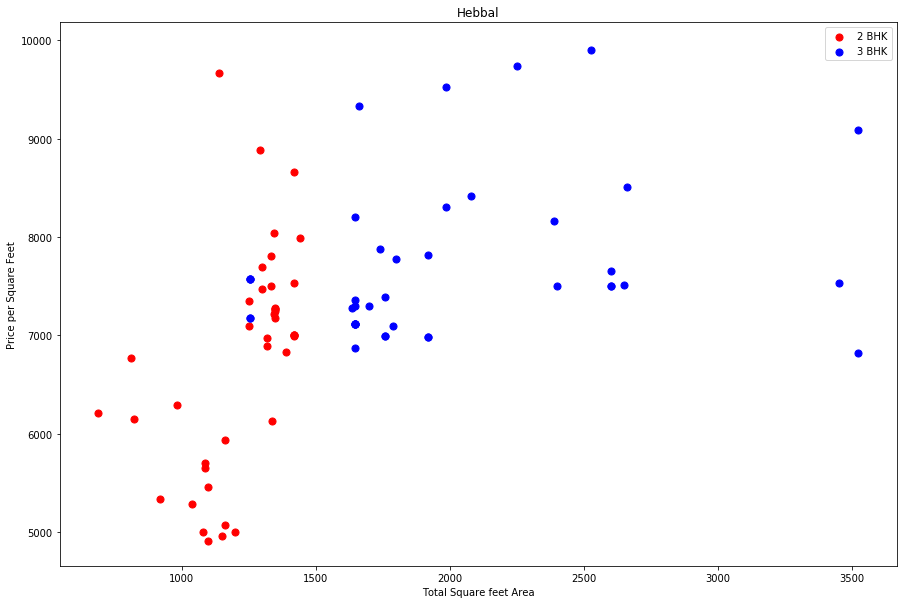

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color='blue',label='3 BHK',s=50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price per Square Feet')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

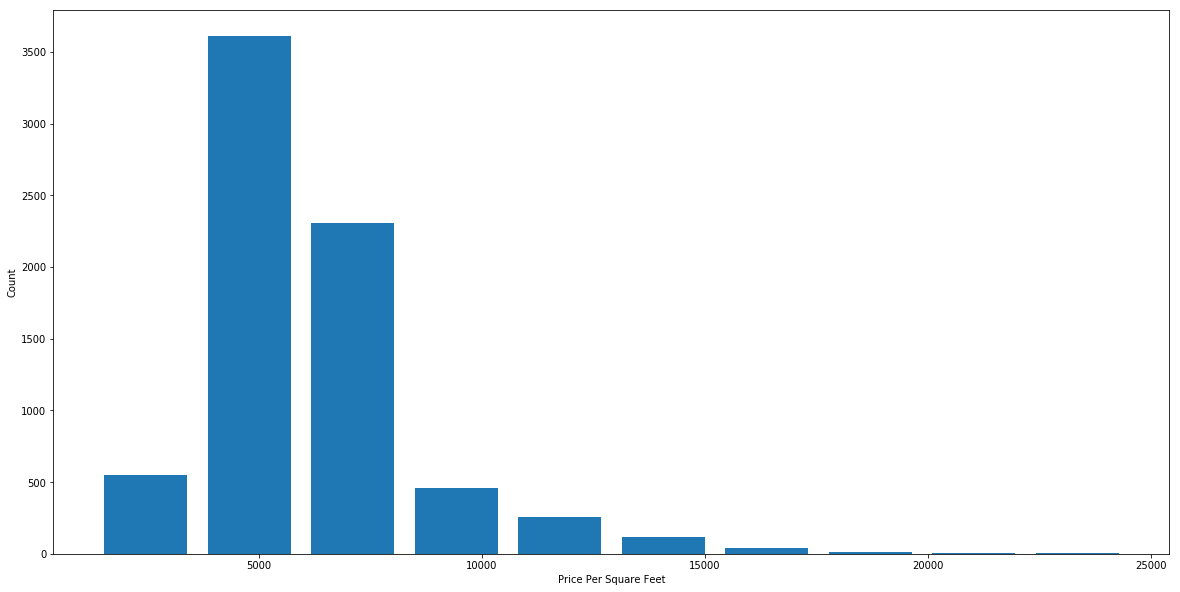

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [42]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8543,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8632,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9365,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9697,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

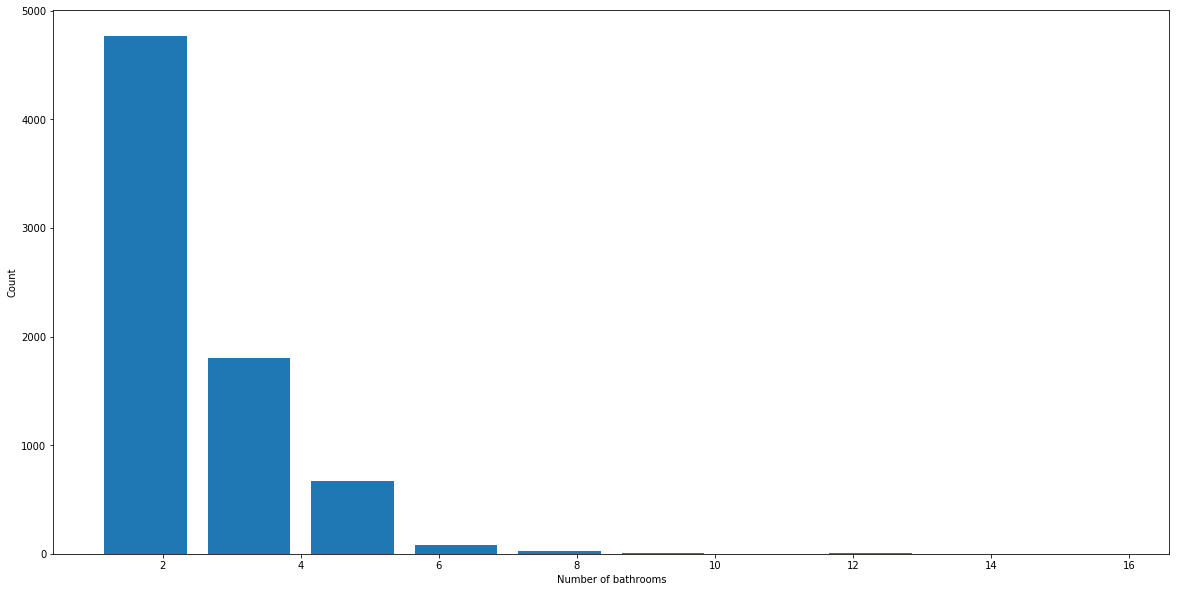

In [44]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [45]:
df6=df6[~(df6.bath+1<df6.BHK) & ~(df6.bath==0)]
df6.shape

(7326, 7)

In [46]:
df6=df6.drop(['size','price_per_sqft'],axis='columns')
df6.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [47]:
dummies=pd.get_dummies(df6.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')

In [49]:
df7=df7.drop('location',axis='columns')
df7.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x= df7.drop('price', axis='columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y=df6.price
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.2,random_state=10)

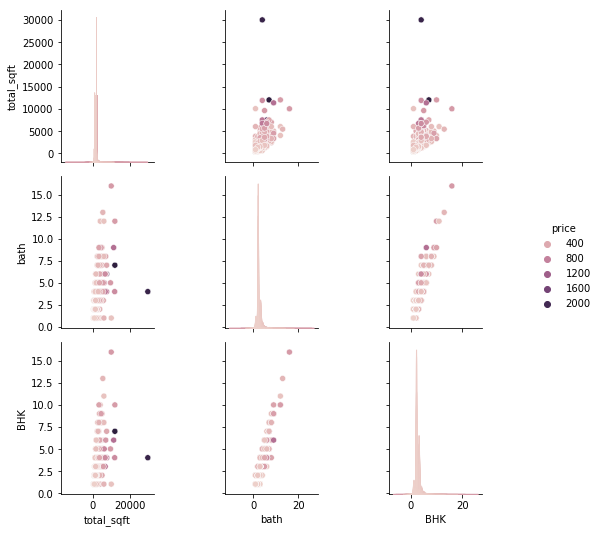

In [52]:
import seaborn as sns
sns.pairplot(df6, hue="price")

In [53]:
from sklearn.linear_model import LinearRegression
ir_clf = LinearRegression()
ir_clf.fit(x_train,y_train)
ir_clf.score(x_test,y_test)

0.8157153122632869

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84916482, 0.84643557, 0.81565651, 0.841367  , 0.87719552])

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():#going through the python dictionary
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.845964,{'normalize': True}
1,lasso,0.697645,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.742333,"{'criterion': 'mse', 'splitter': 'random'}"


In [56]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [57]:
np.where(x.columns=='2nd Phase Judicial Layout')[0][0]

5

In [61]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[[loc_index]] = 1

    return ir_clf.predict([z])[0]


In [63]:
predict_price('1st Phase JP Nagar',1000,2,2)

84.34080524887553